In [1]:
!pip install numpy
!pip install pandas
!pip install tensorflow_cpu==2.18.0


In [2]:
import pandas as pd
import numpy as np
import keras



In [3]:
df = pd.read_csv('/content/concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [5]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [7]:
from sklearn.model_selection import train_test_split

x = df.drop(['Strength'], axis=1)
y = df['Strength']

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)




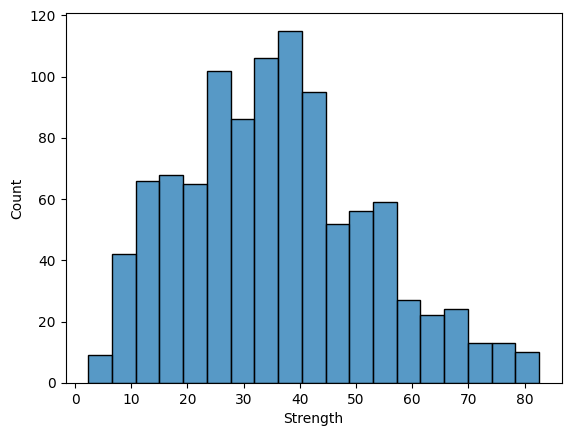

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(y, kde=False)
plt.show()

In [10]:
x_norm = (x - x.mean()) / x.std()
x_norm .head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [11]:
n_cols = x_norm.shape[1]

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input

In [21]:
from tensorflow.keras.metrics import MeanAbsoluteError

model = Sequential()
model.add(Input(shape=(n_cols,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanAbsoluteError()])


In [22]:

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, verbose=2)


Epoch 1/100
20/20 - 1s - 70ms/step - loss: 494.2910 - mean_absolute_error: 17.5806 - val_loss: 259.0813 - val_mean_absolute_error: 13.3243
Epoch 2/100
20/20 - 0s - 6ms/step - loss: 195.5135 - mean_absolute_error: 11.3901 - val_loss: 168.2809 - val_mean_absolute_error: 10.5805
Epoch 3/100
20/20 - 0s - 6ms/step - loss: 154.2603 - mean_absolute_error: 9.9550 - val_loss: 156.4878 - val_mean_absolute_error: 10.0687
Epoch 4/100
20/20 - 0s - 7ms/step - loss: 132.7981 - mean_absolute_error: 9.1378 - val_loss: 144.4163 - val_mean_absolute_error: 9.6708
Epoch 5/100
20/20 - 0s - 6ms/step - loss: 121.9759 - mean_absolute_error: 8.8403 - val_loss: 152.4371 - val_mean_absolute_error: 9.8600
Epoch 6/100
20/20 - 0s - 6ms/step - loss: 124.2655 - mean_absolute_error: 8.8502 - val_loss: 134.3821 - val_mean_absolute_error: 9.3139
Epoch 7/100
20/20 - 0s - 6ms/step - loss: 118.6953 - mean_absolute_error: 8.6595 - val_loss: 122.2212 - val_mean_absolute_error: 8.7850
Epoch 8/100
20/20 - 0s - 6ms/step - loss: 

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)
print("R²  :", r2)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
MSE : 41.23002680490637
RMSE: 6.4210611899363155
MAE : 5.167467456789851
R²  : 0.8399933105884934


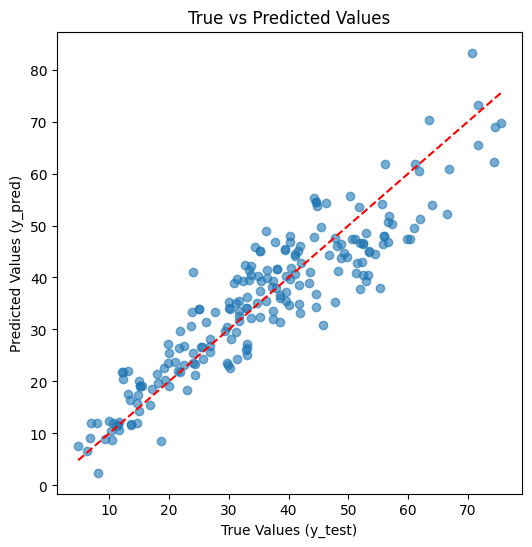

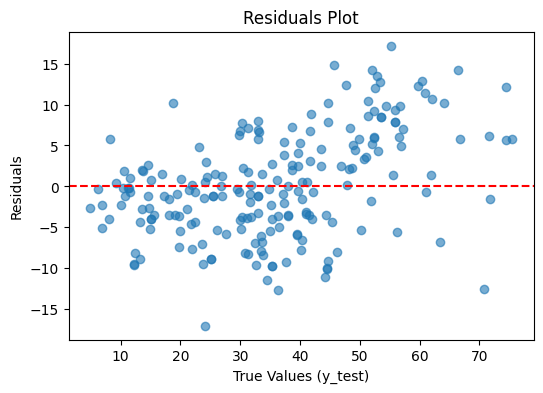

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # line y=x
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("True vs Predicted Values")
plt.show()

residuals = y_test - y_pred.flatten()
plt.figure(figsize=(6,4))
plt.scatter(y_test, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("True Values (y_test)")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()
